In [2341]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2342]:
## New Car 1st Time Registrations 2021 VS Used Car 1st Time Registrations 2021

In [2343]:
# Import TEM01.20220212T110233.csv to Pandas
new_private_cars_1st_time_registrations = pd.read_csv("TEM01.20220212T110233.csv")

In [2344]:
# Explore new_private_cars_1st_time_registrations
print(new_private_cars_1st_time_registrations.head())
print(new_private_cars_1st_time_registrations.tail())
print(new_private_cars_1st_time_registrations.info())
print(new_private_cars_1st_time_registrations.columns)
print(new_private_cars_1st_time_registrations.shape)

                              Statistic    Month    Taxation Class    UNIT  \
0  Vehicles Licensed for the First Time  1996M07  New Private Cars  Number   
1  Vehicles Licensed for the First Time  1996M08  New Private Cars  Number   
2  Vehicles Licensed for the First Time  1996M09  New Private Cars  Number   
3  Vehicles Licensed for the First Time  1996M10  New Private Cars  Number   
4  Vehicles Licensed for the First Time  1996M11  New Private Cars  Number   

   VALUE  
0  10959  
1   6582  
2   5162  
3   4815  
4   3768  
                                Statistic    Month    Taxation Class    UNIT  \
302  Vehicles Licensed for the First Time  2021M09  New Private Cars  Number   
303  Vehicles Licensed for the First Time  2021M10  New Private Cars  Number   
304  Vehicles Licensed for the First Time  2021M11  New Private Cars  Number   
305  Vehicles Licensed for the First Time  2021M12  New Private Cars  Number   
306  Vehicles Licensed for the First Time  2022M01  New Private C

In [2345]:
# Check for NaNs
print(new_private_cars_1st_time_registrations.isna().sum())

Statistic         0
Month             0
Taxation Class    0
UNIT              0
VALUE             0
dtype: int64


In [2346]:
# Import TEM01.20220212T110244.csv to Pandas
used_private_cars_1st_time_registrations = pd.read_csv("TEM01.20220212T110244.csv")

In [2347]:
# Explore used_private_cars_1st_time_registrations
print(used_private_cars_1st_time_registrations.head())
print(used_private_cars_1st_time_registrations.tail())
print(used_private_cars_1st_time_registrations.info())
print(used_private_cars_1st_time_registrations.columns)
print(used_private_cars_1st_time_registrations.shape)

                              Statistic    Month           Taxation Class  \
0  Vehicles Licensed for the First Time  1996M07  Secondhand Private Cars   
1  Vehicles Licensed for the First Time  1996M08  Secondhand Private Cars   
2  Vehicles Licensed for the First Time  1996M09  Secondhand Private Cars   
3  Vehicles Licensed for the First Time  1996M10  Secondhand Private Cars   
4  Vehicles Licensed for the First Time  1996M11  Secondhand Private Cars   

     UNIT  VALUE  
0  Number   3716  
1  Number   3433  
2  Number   3608  
3  Number   4013  
4  Number   3943  
                                Statistic    Month           Taxation Class  \
302  Vehicles Licensed for the First Time  2021M09  Secondhand Private Cars   
303  Vehicles Licensed for the First Time  2021M10  Secondhand Private Cars   
304  Vehicles Licensed for the First Time  2021M11  Secondhand Private Cars   
305  Vehicles Licensed for the First Time  2021M12  Secondhand Private Cars   
306  Vehicles Licensed for t

In [2348]:
# Check for NaNs
print(used_private_cars_1st_time_registrations.isna().sum())

Statistic         0
Month             0
Taxation Class    0
UNIT              0
VALUE             0
dtype: int64


In [2349]:
# Merge Pandas DataFrames
private_cars_1st_time_registrations = pd.merge_ordered(new_private_cars_1st_time_registrations, used_private_cars_1st_time_registrations, on = "Month", suffixes = ("_new","_used"))
print(private_cars_1st_time_registrations.head())

                          Statistic_new    Month Taxation Class_new UNIT_new  \
0  Vehicles Licensed for the First Time  1996M07   New Private Cars   Number   
1  Vehicles Licensed for the First Time  1996M08   New Private Cars   Number   
2  Vehicles Licensed for the First Time  1996M09   New Private Cars   Number   
3  Vehicles Licensed for the First Time  1996M10   New Private Cars   Number   
4  Vehicles Licensed for the First Time  1996M11   New Private Cars   Number   

   VALUE_new                        Statistic_used      Taxation Class_used  \
0      10959  Vehicles Licensed for the First Time  Secondhand Private Cars   
1       6582  Vehicles Licensed for the First Time  Secondhand Private Cars   
2       5162  Vehicles Licensed for the First Time  Secondhand Private Cars   
3       4815  Vehicles Licensed for the First Time  Secondhand Private Cars   
4       3768  Vehicles Licensed for the First Time  Secondhand Private Cars   

  UNIT_used  VALUE_used  
0    Number       

In [2350]:
# Subsetting with Indexes to only get data from 2017-01 to 2021-12
private_cars_1st_time_registrations = private_cars_1st_time_registrations.set_index("Month").sort_index()
car_registrations_from_2017_to_2021 = private_cars_1st_time_registrations["2017M01":"2021M12"]
print(car_registrations_from_2017_to_2021.head(3))
print(car_registrations_from_2017_to_2021.tail(3))
print(car_registrations_from_2017_to_2021.shape)

                                Statistic_new Taxation Class_new UNIT_new  \
Month                                                                       
2017M01  Vehicles Licensed for the First Time   New Private Cars   Number   
2017M02  Vehicles Licensed for the First Time   New Private Cars   Number   
2017M03  Vehicles Licensed for the First Time   New Private Cars   Number   

         VALUE_new                        Statistic_used  \
Month                                                      
2017M01      26668  Vehicles Licensed for the First Time   
2017M02      16905  Vehicles Licensed for the First Time   
2017M03      17180  Vehicles Licensed for the First Time   

             Taxation Class_used UNIT_used  VALUE_used  
Month                                                   
2017M01  Secondhand Private Cars    Number        6798  
2017M02  Secondhand Private Cars    Number        7723  
2017M03  Secondhand Private Cars    Number        8335  
                            

In [2351]:
# Dropping Unwanted Columns
car_registrations_from_2017_to_2021 = car_registrations_from_2017_to_2021.drop(["Statistic_new","Taxation Class_new","UNIT_new","Statistic_used","Taxation Class_used","UNIT_used"], axis = 1)
print(car_registrations_from_2017_to_2021.head())

         VALUE_new  VALUE_used
Month                         
2017M01      26668        6798
2017M02      16905        7723
2017M03      17180        8335
2017M04      13427        7272
2017M05       9581        7732


In [2352]:
# Rename Columns
car_registrations_from_2017_to_2021 = car_registrations_from_2017_to_2021.rename({"VALUE_new" : "New-Car-Registrations" , "VALUE_used" : "Used-Car-Registrations"},axis = 1)
print(car_registrations_from_2017_to_2021.head())

         New-Car-Registrations  Used-Car-Registrations
Month                                                 
2017M01                  26668                    6798
2017M02                  16905                    7723
2017M03                  17180                    8335
2017M04                  13427                    7272
2017M05                   9581                    7732


In [2353]:
# Using for loop to Format Dates to International Standard
car_registrations_from_2017_to_2021.index = [x.replace("M","-") for x in car_registrations_from_2017_to_2021.index]
print(car_registrations_from_2017_to_2021.head())

         New-Car-Registrations  Used-Car-Registrations
2017-01                  26668                    6798
2017-02                  16905                    7723
2017-03                  17180                    8335
2017-04                  13427                    7272
2017-05                   9581                    7732


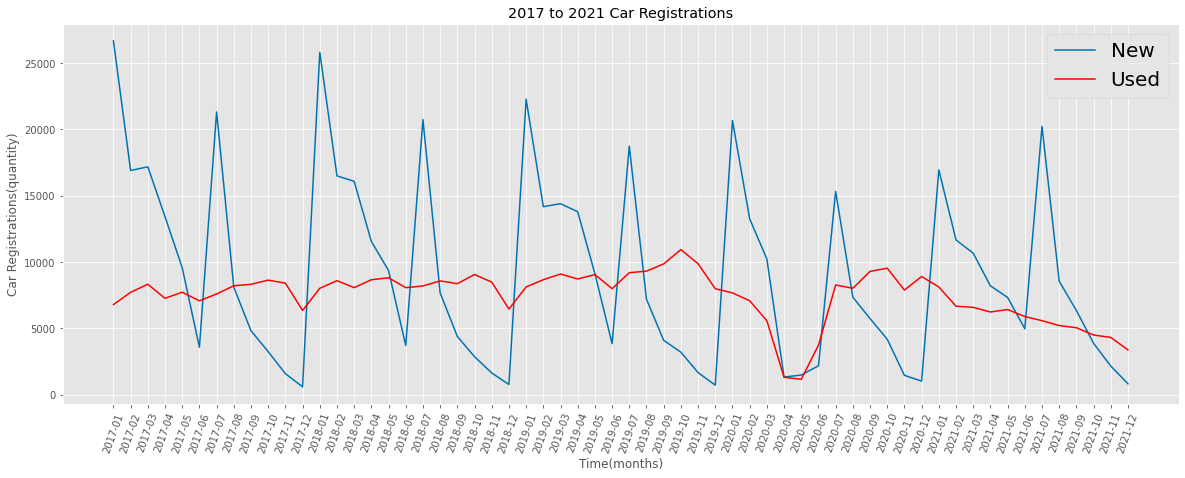

In [2354]:
# Plotting
plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
ax.plot(car_registrations_from_2017_to_2021["New-Car-Registrations"], label = "New",)
ax.plot(car_registrations_from_2017_to_2021["Used-Car-Registrations"], label = "Used", color="red")
ax.set_xlabel("Time(months)")
ax.set_ylabel("Car Registrations(quantity)")

plt.title("2017 to 2021 Car Registrations")
plt.xticks(rotation = 70, fontsize=10)
plt.legend(loc='upper right', prop={'size': 20})
fig.set_size_inches([20,7])
fig.savefig("2017_to_2021_Car_Registrations.png",dpi=300)
plt.show()


In [2355]:
## Top Selling New Cars 2021

In [2356]:
##Atempted to import dataset through API but ran into issues
#newcars = requests.get()  
#pd.DataFrame(newcars.json()).head() 

In [2357]:
# Import Dataset to Pandas DataFrame
newcars = pd.read_csv("TEA28.20220213T180245.csv")

In [2358]:
# Exploring Data
print(newcars.head())
print(newcars.tail())
print(newcars.info())
print(newcars.columns)
print(newcars.shape)

                                      Statistic  Year        Make and Model  \
0  New Private Cars Licensed for the First Time  2021  Alfa Romeo Giulietta   
1  New Private Cars Licensed for the First Time  2021     Alfa Romeo Giulia   
2  New Private Cars Licensed for the First Time  2021    Alfa Romeo Stelvio   
3  New Private Cars Licensed for the First Time  2021               Audi TT   
4  New Private Cars Licensed for the First Time  2021               Audi A3   

     UNIT  VALUE  
0  Number   10.0  
1  Number   22.0  
2  Number    7.0  
3  Number    6.0  
4  Number  792.0  
                                             Statistic  Year Make and Model  \
491  New Private Cars Licensed for the First Time Rank  2021      Volvo S90   
492  New Private Cars Licensed for the First Time Rank  2021      Volvo V90   
493  New Private Cars Licensed for the First Time Rank  2021     Volvo XC40   
494  New Private Cars Licensed for the First Time Rank  2021          Other   
495  New Private

In [2359]:
# Dealing with NaNs in Dataset
print(newcars.isna().sum())

Statistic          0
Year               0
Make and Model     0
UNIT               0
VALUE             32
dtype: int64


In [2360]:
# Creating my function to find out percentage of NaNs in Dataset
def my_func(a):
    percentage = (a/newcars.shape[0])*100
    return percentage

# Using my function to find out percentage of NaNs in VALUE Column
print(my_func(32))

6.451612903225806


In [2361]:
# Dropping NaNs from Dataset
newcars = newcars.dropna()

In [2362]:
# Subsetting with Indexes to only get data for "New Private Cars Licensed for the First Time"
newcars = newcars.set_index("Statistic")
newcars = newcars.loc[:"New Private Cars Licensed for the First Time"]
print(newcars.tail())
print(newcars.shape)

                                              Year Make and Model    UNIT  \
Statistic                                                                   
New Private Cars Licensed for the First Time  2021      Volvo S90  Number   
New Private Cars Licensed for the First Time  2021      Volvo V90  Number   
New Private Cars Licensed for the First Time  2021     Volvo XC40  Number   
New Private Cars Licensed for the First Time  2021          Other  Number   
New Private Cars Licensed for the First Time  2021     All models  Number   

                                                 VALUE  
Statistic                                               
New Private Cars Licensed for the First Time      36.0  
New Private Cars Licensed for the First Time      14.0  
New Private Cars Licensed for the First Time     516.0  
New Private Cars Licensed for the First Time    2845.0  
New Private Cars Licensed for the First Time  101853.0  
(248, 4)


In [2363]:
# Reset Index
newcars = newcars.reset_index()
print(newcars.head())

                                      Statistic  Year        Make and Model  \
0  New Private Cars Licensed for the First Time  2021  Alfa Romeo Giulietta   
1  New Private Cars Licensed for the First Time  2021     Alfa Romeo Giulia   
2  New Private Cars Licensed for the First Time  2021    Alfa Romeo Stelvio   
3  New Private Cars Licensed for the First Time  2021               Audi TT   
4  New Private Cars Licensed for the First Time  2021               Audi A3   

     UNIT  VALUE  
0  Number   10.0  
1  Number   22.0  
2  Number    7.0  
3  Number    6.0  
4  Number  792.0  


In [2364]:
# Subsetting with Indexes to only get Data for 2021
newcars = newcars.set_index("Year").sort_index()
cars2021 = newcars.loc["2021":]
print(cars2021.shape)

(248, 4)


In [2365]:
# Reset Index
cars2021 = cars2021.reset_index()
print(newcars.head())

                                         Statistic        Make and Model  \
Year                                                                       
2021  New Private Cars Licensed for the First Time  Alfa Romeo Giulietta   
2021  New Private Cars Licensed for the First Time     Alfa Romeo Giulia   
2021  New Private Cars Licensed for the First Time    Alfa Romeo Stelvio   
2021  New Private Cars Licensed for the First Time               Audi TT   
2021  New Private Cars Licensed for the First Time               Audi A3   

        UNIT  VALUE  
Year                 
2021  Number   10.0  
2021  Number   22.0  
2021  Number    7.0  
2021  Number    6.0  
2021  Number  792.0  


In [2366]:
# Dropping Columns
cars2021 = cars2021[["Make and Model","VALUE"]]
print(cars2021.head())
print(cars2021.shape)

         Make and Model  VALUE
0  Alfa Romeo Giulietta   10.0
1     Alfa Romeo Giulia   22.0
2    Alfa Romeo Stelvio    7.0
3               Audi TT    6.0
4               Audi A3  792.0
(248, 2)


In [2367]:
# Rename Columns
cars2021 = cars2021.rename({"VALUE":"Registered"}, axis = 1)
print(cars2021.head())

         Make and Model  Registered
0  Alfa Romeo Giulietta        10.0
1     Alfa Romeo Giulia        22.0
2    Alfa Romeo Stelvio         7.0
3               Audi TT         6.0
4               Audi A3       792.0


In [2368]:
# Check Unique Values in Make and Model column
cars2021_unique_values = cars2021["Make and Model"].unique()
print(cars2021_unique_values)
print(cars2021.shape)

['Alfa Romeo Giulietta' 'Alfa Romeo Giulia' 'Alfa Romeo Stelvio' 'Audi TT'
 'Audi A3' 'Audi A4' 'Audi A6' 'Audi A8' 'Audi Q7' 'Audi S5' 'Audi A5'
 'Audi Q5' 'Audi A1' 'Audi A7' 'Audi Q3' 'Audi Q2' 'Audi Q8' 'Audi e-tron'
 'BMW 5 Series' 'BMW 7 Series' 'BMW X5' 'BMW 6 Series' 'BMW X3' 'BMW M5'
 'BMW 8 Series' 'BMW 3 Series' 'BMW X1' 'BMW 1 Series' 'BMW 4 Series'
 'BMW i3' 'BMW 2 Series' 'BMW M4' 'BMW X4' 'BMW M2' 'BMW X2' 'BMW X7'
 'BMW iX' 'Citroen C3' 'Citroen C4' 'Citroen C1' 'Citroen DS3'
 'Citroen C4 Cactus' 'Citroen Grand C4 Spacetourer' 'Citroen C3 Aircross'
 'Citroen C5 Aircross' 'Cupra Formentor' 'Dacia Sandero' 'Dacia Duster'
 'Dacia Logan' 'Fiat Punto' 'Fiat Tipo' 'Fiat 500' 'Fiat Panda'
 'Fiat 500L' 'Fiat 500X' 'Ford Fiesta' 'Ford Mondeo' 'Ford Galaxy'
 'Ford Puma' 'Ford Ka' 'Ford Focus' 'Ford C-Max' 'Ford Kuga'
 'Ford Grand C-Max' 'Ford Ecosport' 'Ford Mustang' 'Ford Edge'
 'Honda Civic' 'Honda Jazz' 'Honda CR-V' 'Honda HR-V' 'Hyundai Santa Fe'
 'Hyundai Tucson' 'Hyundai i3

In [2369]:
# Remove unwanted values through Indexes
cars2021 = cars2021.set_index("Make and Model")
cars2021.drop(["Other","All models"], axis=0, inplace=True)
print(cars2021.shape)

(246, 1)


In [2370]:
# Reset Index
cars2021 = cars2021.reset_index()
print(cars2021.head())

         Make and Model  Registered
0  Alfa Romeo Giulietta        10.0
1     Alfa Romeo Giulia        22.0
2    Alfa Romeo Stelvio         7.0
3               Audi TT         6.0
4               Audi A3       792.0


In [2371]:
# Change Data Type
print(cars2021.dtypes)
cars2021["Registered"] = cars2021["Registered"].astype(int)
print(cars2021.head())

Make and Model     object
Registered        float64
dtype: object
         Make and Model  Registered
0  Alfa Romeo Giulietta          10
1     Alfa Romeo Giulia          22
2    Alfa Romeo Stelvio           7
3               Audi TT           6
4               Audi A3         792


In [2372]:
# Change Name
cars_registered_2021 = cars2021

In [2373]:
# Sort by Cars Registered
cars_registered_2021 = cars_registered_2021.sort_values("Registered", ascending = False)
print(cars_registered_2021.head())

        Make and Model  Registered
72      Hyundai Tucson        4948
220     Toyota Corolla        4161
217       Toyota Yaris        2718
231  Volkswagen Tiguan        2502
191      Skoda Octavia        2479


In [2374]:
# Subset Top 5 Most Popular Cars for 2021
top_5_most_popular_cars_for_2021 = cars_registered_2021.head(5)
top_5_most_popular_cars_for_2021 = top_5_most_popular_cars_for_2021.set_index("Make and Model")
print(top_5_most_popular_cars_for_2021)

                   Registered
Make and Model               
Hyundai Tucson           4948
Toyota Corolla           4161
Toyota Yaris             2718
Volkswagen Tiguan        2502
Skoda Octavia            2479


C:\Users\Ross Coleman\AppData\Local\Temp\ipykernel_9464\2018655785.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_5_most_popular_cars_for_2021.index, rotation = 45, fontsize = 15)


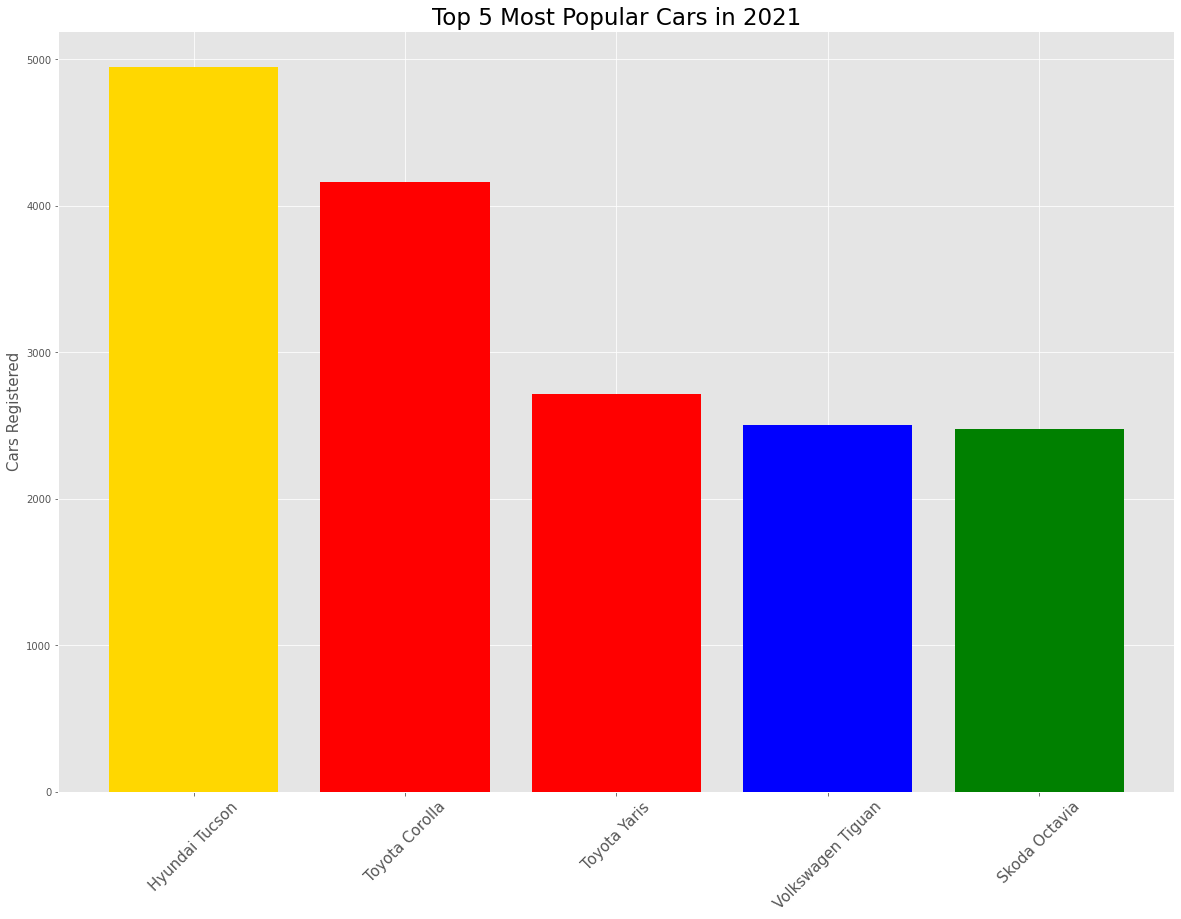

In [2375]:
# Plotting
plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
ax.bar(top_5_most_popular_cars_for_2021.index, top_5_most_popular_cars_for_2021["Registered"], color=['gold', 'red', 'red', 'blue', 'green'] )
ax.set_ylabel("Cars Registered", fontsize = 15)
plt.title("Top 5 Most Popular Cars in 2021", fontsize = 23)
ax.set_xticklabels(top_5_most_popular_cars_for_2021.index, rotation = 45, fontsize = 15)
fig.set_size_inches([20,14])
fig.savefig("Top_5_Most_Popular_Cars_in_2021.png",dpi=300)
plt.show()


In [2376]:
## 2021 Market Demand of High-End Cars VS Mid-Range Cars

In [2377]:
# Subsetting with Indexes to only get Data for 2021
car_brands = cars_registered_2021.reset_index()
print(car_brands.tail(40))
car_brands = car_brands.loc[:215]
print(car_brands.tail(3))

     index     Make and Model  Registered
206    112           Lexus LS           2
207    232      Volkswagen Up           1
208    114           Lexus CT           1
209    221       Toyota Auris           1
210    213      Tesla Model X           1
211     61         Ford C-Max           1
212    146      Nissan Pulsar           1
213     63   Ford Grand C-Max           1
214    116           Lexus RC           1
215     49         Fiat Punto           1
216    110           Lexus IS           0
217    111           Lexus GS           0
218    101        Kia Stinger           0
219    240          Volvo V40           0
220    229  Volkswagen Beetle           0
221     97          Kia Venga           0
222    228  Volkswagen Sharan           0
223    227   Volkswagen Jetta           0
224     90         Kia Carens           0
225      9            Audi S5           0
226    187           Seat Mii           0
227     78        Hyundai i40           0
228     59            Ford Ka     

In [2378]:
# Adding Column for Car Make
make = car_brands["Make and Model"].str.split(" ", n = 1, expand = True)
car_brands["Make"] = make[0]
print(car_brands.head())

   index     Make and Model  Registered        Make
0     72     Hyundai Tucson        4948     Hyundai
1    220     Toyota Corolla        4161      Toyota
2    217       Toyota Yaris        2718      Toyota
3    231  Volkswagen Tiguan        2502  Volkswagen
4    191      Skoda Octavia        2479       Skoda


In [2379]:
# Identifying All Car Makes sold in Ireland
car_brands_unique = car_brands["Make"].unique()
print(car_brands_unique)

['Hyundai' 'Toyota' 'Volkswagen' 'Skoda' 'Ford' 'Kia' 'Peugeot' 'Nissan'
 'Renault' 'Seat' 'Dacia' 'BMW' 'Tesla' 'Opel' 'Mercedes' 'Audi' 'Suzuki'
 'Mini' 'Volvo' 'Mercedes-Benz' 'Citroen' 'Landrover' 'Honda' 'Mazda' 'MG'
 'Mitsubishi' 'Cupra' 'Lexus' 'Fiat' 'Jaguar' 'Porsche' 'KIA' 'Ssangyong'
 'Alfa' 'Subaru' 'Jeep']


In [2380]:
# Using a list to Classify Car Makes in terms of Market Segment and adding Data to New Column with np.where
premium_dict={'BMW', 'Tesla', 'Mercedes', 'Audi', 'Mercedes-Benz', 'Landrover', 'Cupra', 'Lexus', 'Jaguar', 'Porsche', 'Jeep'}
car_brands["Classification"] = np.where(car_brands["Make"].isin(premium_dict),"High-End", "Mid-Range")
print(car_brands.head())

   index     Make and Model  Registered        Make Classification
0     72     Hyundai Tucson        4948     Hyundai      Mid-Range
1    220     Toyota Corolla        4161      Toyota      Mid-Range
2    217       Toyota Yaris        2718      Toyota      Mid-Range
3    231  Volkswagen Tiguan        2502  Volkswagen      Mid-Range
4    191      Skoda Octavia        2479       Skoda      Mid-Range


In [2381]:
# Tidy Up DataFrame
car_brands = car_brands.reindex(columns=["Make","Make and Model","Classification", "Registered"])
car_brands= car_brands.set_index("Make")
print(car_brands.head())

               Make and Model Classification  Registered
Make                                                    
Hyundai        Hyundai Tucson      Mid-Range        4948
Toyota         Toyota Corolla      Mid-Range        4161
Toyota           Toyota Yaris      Mid-Range        2718
Volkswagen  Volkswagen Tiguan      Mid-Range        2502
Skoda           Skoda Octavia      Mid-Range        2479


In [2382]:
# Getting High-End VS Mid-Range using .groupby
market_breakdown = car_brands.groupby("Classification", as_index=False)["Registered"].sum()
market_breakdown = market_breakdown.set_index("Classification")
print(market_breakdown)

                Registered
Classification            
High-End             13810
Mid-Range            85198


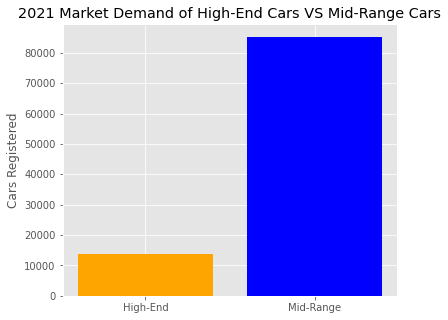

In [2383]:
# Plotting
plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
ax.bar(market_breakdown.index, market_breakdown["Registered"], color = ["orange", "blue"])
ax.set_ylabel("Cars Registered")
plt.title("2021 Market Demand of High-End Cars VS Mid-Range Cars")
fig.set_size_inches([6,5])
fig.savefig("2021_Market_Demand_of_High-End_Cars_VS_Mid-Range_Cars.png", dpi=300)
plt.show()